income 결측치 제거하기.


In [154]:
print("Hello World")


Hello World


In [155]:
import pandas as pd

In [156]:
file_path = '/Users/leeanhae/Downloads/superstore_data.csv'





In [157]:
pip install --upgrade pip


245371.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [158]:
pip install pandas


245379.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [159]:
df = pd.read_csv(file_path)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [162]:
#결측지 제거1 총결제금액과 인컴의 상관관계를 생각해서 평균구하기
df['total_mnt'] = df['MntWines'] + df['MntFruits']

In [165]:
#결측치제거2 나이로 평균값구하기
#1.2024년에서 태어난 날을 빼주어서 나이값 구하기 Age로 별칭
#2.Age 구간을 구분해주기( 그 전에 결측치 처리)
#3.구간별 소득 평균값 도출하기

#1.2024년에서 태어난 날을 빼주어서 나이값 구하기 Age로 별칭
df['Age'] = 2024 - df['Year_Birth']

In [167]:
age_info = df.set_index('Age')

In [169]:
#여기서 문제, 나이가 124-131살이 있다?
#=> 데이터를 살펴보면, 2n Cycle이란 용어는 교육수준에서 사용되지 않고, 134세의 고령의 나이로 10대 자식이 있는 것도 평균적이지 않다. 데이터가 잘못 기입됐을 가능성이 높으며 100세 이상의 나이값 3개 중 2개가 데이터가 이상하므로 결측치로 판단하여 데이터에서 제외한다. none값으로 변경한다.
sorted_df = df.sort_values(by = 'Age', ascending=False)
sorted_df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,total_mnt,Age,Age_group
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/2014,23,8,...,1,1,0,2,4,0,0,8,131,NaN
827,1150,1899,PhD,Together,83532.0,0,0,9/26/2013,36,755,...,1,4,6,4,1,0,0,899,125,NaN
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,1,2,1,2,5,0,1,21,124,NaN
2171,6663,1940,PhD,Single,51141.0,0,0,8/7/2013,96,144,...,1,3,1,4,5,0,0,144,84,over_60s
1740,6932,1941,PhD,Married,93027.0,0,0,4/13/2013,77,1285,...,0,7,10,5,2,0,0,1327,83,over_60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,10548,1995,Graduation,Single,71163.0,0,0,9/3/2014,30,283,...,1,3,8,12,1,0,0,300,29,20s
1468,5184,1995,Graduation,Single,34824.0,0,0,3/26/2014,65,4,...,1,1,0,2,6,0,0,6,29,20s
964,3661,1995,2n Cycle,Single,80617.0,0,0,12/10/2012,42,594,...,1,4,6,8,2,0,0,645,29,20s
1824,193,1996,Basic,Married,14421.0,0,0,2/17/2014,81,0,...,1,1,0,2,5,0,0,0,28,20s


In [208]:
#2.Age 구간을 구분해주기 20대
# 나이를 구간으로 나누고, bins 매개변수에 각 구간을 지정하고, labels 매개변수에 각 구간에 해당하는 레이블을 지정
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age_group'] = '20s'
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age_group'] = '30s'
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age_group'] = '40s'
df.loc[(df['Age'] >= 50) & (df['Age'] < 60), 'Age_group'] = '50s'
df.loc[(df['Age'] >= 60) & (df['Age'] < 70), 'Age_group'] = '60s'
df.loc[(df['Age'] >= 70) & (df['Age'] < 80), 'Age_group'] = '70s'
df.loc[(df['Age'] >= 80) & (df['Age'] < 90), 'Age_group'] = '80s'
                

In [209]:
grouped_by_age = df.groupby('Age_group')

In [211]:
#3.구간별 소득 평균값 도출하기
#
average_income_20s = df[df['Age_group'] == '20s']['Income'].mean()
average_income_30s = df[df['Age_group'] == '30s']['Income'].mean()
average_income_40s = df[df['Age_group'] == '40s']['Income'].mean()
average_income_50s = df[df['Age_group'] == '50s']['Income'].mean()
average_income_60s = df[df['Age_group'] == '60s']['Income'].mean()
average_income_70s = df[df['Age_group'] == '70s']['Income'].mean()
average_income_80s = df[df['Age_group'] == '80s']['Income'].mean()
# 평균 소득값 계산
average_income_by_age = df.groupby('Age_group')['Income'].mean().reset_index()
average_income_by_age['Income'] = average_income_by_age['Income'].round().astype(int)
print(average_income_by_age)

  Age_group  Income
0       20s   46658
1       30s   46283
2       40s   49225
3       50s   50813
4       60s   56201
5       70s   58611
6       80s   65564


In [ ]:
new_df = df[['Income', 'Age']]
corr = new_df.corr()
corr

<나이와 구매루트별 및 총 구매 횟수의 상관관계(평균값)>
     NumDealsPurchases    
 16  NumWebPurchases      
 17  NumCatalogPurchases 
 18  NumStorePurchases    
 19  NumWebVisitsMonth 

In [187]:
#Age group별 구매루트별 구매 횟수의 상관관계
#3.구간별 구매루트 평균값 도출하기

average_income_20s = df[df['Age_group'] == '20s']['Income'].mean()
average_income_30s = df[df['Age_group'] == '30s']['Income'].mean()
average_income_40s = df[df['Age_group'] == '40s']['Income'].mean()
average_income_50s = df[df['Age_group'] == '50s']['Income'].mean()
average_income_60s = df[df['Age_group'] == 'over_60s']['Income'].mean()
# 평균 소득값 계산
average_income_by_age = df.groupby('Age_group')['Income'].mean().reset_index()
average_income_by_age['Income'] = average_income_by_age['Income'].round().astype(int)
print(average_income_by_age)

  Age_group  Income
0       20s   46658
1       30s   46283
2       40s   49225
3       50s   50813
4  over_60s   57313


<나이와 구매루트별 및 총 구매 횟수의 상관관계(평균값)>
1. Age group별 구매루트별 구매 횟수의 상관관계
2. Age group별 총 구매 횟수의 상관관계(구매루트별 구매 횟수의 총합산

In [ ]:
# '구매루트' 칼럼의 정보 확인
print("NumDealsPurchases 칼럼의 고유한 값:", df['NumDealsPurchases'].unique())

In [ ]:
# '구매루트' 칼럼의 정보 확인
print("NumWebPurchases 칼럼의 고유한 값:", df['NumWebPurchases'].unique())

In [ ]:
# '구매루트' 칼럼의 정보 확인
print("NumCatalogPurchases 칼럼의 고유한 값:", df['NumCatalogPurchases'].unique())

In [ ]:
# '구매루트' 칼럼의 정보 확인
print("NumStorePurchases 칼럼의 고유한 값:", df['NumStorePurchases'].unique())

In [ ]:
print("\nNumStorePurchases 칼럼 정보:")
df['NumStorePurchases'].info()

In [198]:
#  방법 2. "Age_그룹에 따른 구매루트의 평균 횟수" -> 'Age_그룹'을 인덱스로 하고 구매루트별 평균열을 포함하는 피벗 테이블 aggfunc=mean활용.
pivot_df = df.pivot_table(index='Age_group', values=['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebPurchases'], aggfunc='mean')

# 결과 출력
pivot_df

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases
Age_group,,,,
20s,3.571429,1.285714,5.857143,2.571429
30s,2.485981,1.663551,5.504673,3.378505
40s,2.292639,2.226212,5.310592,3.739677
50s,2.329882,2.554734,5.579882,4.121302
over_60s,3.252874,2.392082,6.402299,4.512133


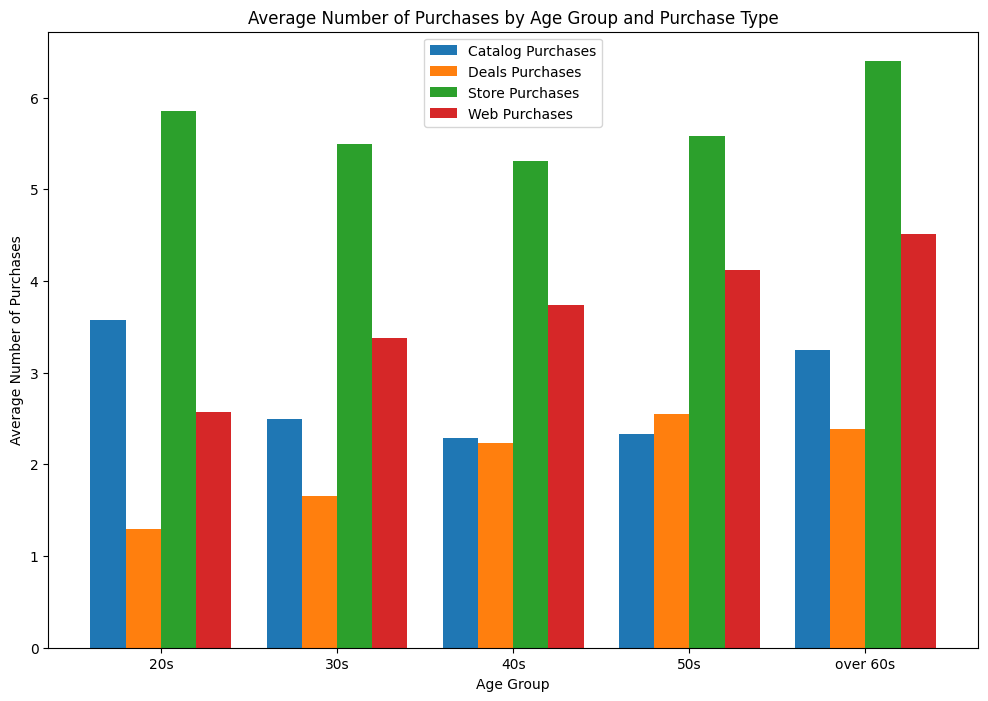

In [200]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
age_groups = ['20s', '30s', '40s', '50s', 'over 60s']
num_catalog_purchases = [3.57, 2.49, 2.29, 2.33, 3.25]
num_deals_purchases = [1.29, 1.66, 2.23, 2.55, 2.39]
num_store_purchases = [5.86, 5.50, 5.31, 5.58, 6.40]
num_web_purchases = [2.57, 3.38, 3.74, 4.12, 4.51]

# x 위치 설정
x = np.arange(len(age_groups))
width = 0.2

# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(x - 1.5*width, num_catalog_purchases, width, label='Catalog Purchases')
bar2 = ax.bar(x - 0.5*width, num_deals_purchases, width, label='Deals Purchases')
bar3 = ax.bar(x + 0.5*width, num_store_purchases, width, label='Store Purchases')
bar4 = ax.bar(x + 1.5*width, num_web_purchases, width, label='Web Purchases')

# 그래프 라벨 및 타이틀 설정
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Number of Purchases')
ax.set_title('Average Number of Purchases by Age Group and Purchase Type')
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

# 그래프 보여주기
plt.show()


In [192]:
#진영님코드
purchase_stats_by_age = grouped_by_age[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].mean()
purchase_stats_by_age

,Age_group,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
0,20s,1.285714,3.571429,5.857143,2.571429
1,30s,1.663551,2.485981,5.504673,3.378505
2,40s,2.226212,2.292639,5.310592,3.739677
3,50s,2.554734,2.329882,5.579882,4.121302
4,over_60s,2.392082,3.252874,6.402299,4.512133


In [174]:
average_purchase_by_age = df.groupby('Age_group')[['NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']].mean().reset_index()

# 결과 출력
print(average_purchase_by_age)

  Age_group  NumCatalogPurchases  NumDealsPurchases  NumStorePurchases  \
0       20s             3.571429           1.285714           5.857143   
1       30s             2.485981           1.663551           5.504673   
2       40s             2.292639           2.226212           5.310592   
3       50s             2.329882           2.554734           5.579882   
4  over_60s             3.252874           2.392082           6.402299   

   NumWebPurchases  NumWebVisitsMonth  
0         2.571429           5.000000  
1         3.378505           5.313084  
2         3.739677           5.587074  
3         4.121302           5.649408  
4         4.512133           4.848020  


In [182]:
#  방법 2. 맞는 방법.. "Age_그룹에 따른 구매루트의 평균 횟수" -> 'Age_그룹'을 인덱스로 하고 구매루트별 평균열을 포함하는 피벗 테이블 aggfunc=mean활용.
pivot_df = df.pivot_table(index='Age_group', values=['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth'],aggfunc='mean')

# 결과 출력
print(pivot_df)

           NumCatalogPurchases  NumDealsPurchases  NumStorePurchases  \
Age_group                                                              
20s                   3.571429           1.285714           5.857143   
30s                   2.485981           1.663551           5.504673   
40s                   2.292639           2.226212           5.310592   
50s                   2.329882           2.554734           5.579882   
over_60s              3.252874           2.392082           6.402299   

           NumWebPurchases  NumWebVisitsMonth  
Age_group                                      
20s               2.571429           5.000000  
30s               3.378505           5.313084  
40s               3.739677           5.587074  
50s               4.121302           5.649408  
over_60s          4.512133           4.848020  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 피벗 테이블 데이터
data = {
    'Age_group': ['20s', '30s', '40s', '50s', 'over_60s'],
    'NumCatalogPurchases': [3.571429, 2.485981, 2.292639, 2.329882, 3.252874],
    'NumDealsPurchases': [1.285714, 1.663551, 2.226212, 2.554734, 2.392082],
    'NumStorePurchases': [5.857143, 5.504673, 5.310592, 5.579882, 6.402299],
    'NumWebPurchases': [2.571429, 3.378505, 3.739677, 4.121302, 4.512133],
}
pivot_df = pd.DataFrame(data).set_index('Age_group')

# 피벗 테이블 시각화
pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('count_purchaseroot_by_Age_group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Purchase')
plt.xticks(rotation=0)
plt.legend(title='Purchase Type')
plt.tight_layout()
plt.show()

In [ ]:
# 'Age' 칼럼의 정보 확인
df['Age'].info()

In [ ]:
# 예제 데이터프레임 생성
data = {
    'Age_group': ['20s', '20s', '30s', '30s', '40s', '40s', '50s', '50s', 'over_60s', 'over_60s'],
    'NumDealsPurchases': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'NumWebPurchases': [2, 3, 2, 4, 2, 3, 2, 4, 2, 4],
    'NumCatalogPurchases': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'NumStorePurchases': [5, 6, 5, 7, 5, 6, 5, 7, 5, 6],
    'NumWebVisitsMonth': [5, 6, 5, 4, 5, 4, 5, 4, 5, 4]
}
df = pd.DataFrame(data)

In [ ]:
# 'Age'를 인덱스로 하고 구매루트별 열을 포함하는 피벗 테이블 => "Age에 따른 구매루트의 합"
pivot_df = df.pivot_table(index='Age_group', values=['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth'], aggfunc='sum')

# 결과 출력
print(pivot_df)

In [ ]:
# 각 그룹의 평균 구매 통계 확인
purchase_stats_by_age = grouped_by_age[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].mean()

In [ ]:
#결측치제거3 가족구성원 수로 평균값구하기 (1인, 1인이 아닌 가구)
# 1인: marital_status 가 Divorced, Single, Widow, YOLO, Alone, Absurd kidhome:0 , Teenhome:0
# 1인이 아닌 가구: 1. Married, Together kidhome >= 0, kidhome >= 0
#               2. Divorced, Single, Widow, YOLO, Alone, Absurd kidhome > 0 , Teenhome > 0

#Income - customer's yearly household income
#Mean 52.2k


df['Marital_Status'].unique()

df
# 가구당 평균 소득 먼저 구하고, 평균 소득이 기존 데이터와 일치하는지 확인 - 타당성 증명
# 데이터 상 평균 소득이 일리가 있음을 나타낸후
# 결측치에 평균값 적용

In [180]:
#결측치 제거 
# 교육 수준 컬럼 (1~5로 구분, 베이직:1 , phd:5)
education_mapping = {
    'Basic': 1,
    '2n Cycle': 3,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}
df['Education_by_num'] = df['Education'].map(education_mapping)

df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
# Dt_Customer를 datetime 타입으로 변환
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
# 현재 날짜를 기준으로 Recency 계산 > 패스트와 리센트
current_date = dt.datetime(2024, 5, 20)
df['Recency'] = (current_date - df['Dt_Customer']).dt.days 
#total_mounts = Frency 3회이상 구매시 high low
#total_Purchase = montary 500달러 이상시 high low
